<a href="https://colab.research.google.com/github/SakaSaheed/AI-ML-Project/blob/main/Raisin_Variety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modeling of Raisin Variety Classification Dataset

In [6]:
#import libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
#Import data from google drive
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

#url = "https://drive.google.com/file/d/1i_OvUbfV2oW-7kh3V_GiCaUASIyYuFlU/view?usp=sharing"
url = "https://drive.google.com/file/d/1d3L6L4VbHknngCCHgkvyz-H37KJ-xTfW/view?usp=sharing"
data = read_gd(url)

df = pd.read_csv(data)

df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


#Data uploading

In [8]:
#import data
#df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")
#df.head()
#df = pd.read_excel("/content/Raisin_Dataset.xlsx")
#df = pd.read_excel("/Raisin_Dataset.xlsx")
#df.head()

#Data preprocessing

In [9]:
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,Besni


#Display Unique Values

In [10]:
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [11]:
df['Extent']

,Extent
0,0.758651
1,0.684130
2,0.637613
3,0.699599
4,0.792772
...,...
895,0.668793
896,0.636476
897,0.741099
898,0.658798


In [12]:
df[['Extent', 'Area']]

,Extent,Area
0,0.758651,87524
1,0.684130,75166
2,0.637613,90856
3,0.699599,45928
4,0.792772,79408
...,...,...
895,0.668793,83248
896,0.636476,87350
897,0.741099,99657
898,0.658798,93523


#To show values assigned to a column

In [13]:
for id, unique_class in enumerate(df['Class'].unique()):
  print(unique_class)

Kecimen
Besni


#OR

In [14]:
rice_classes = df['Class'].unique()
classes = {unique_class:id for id, unique_class in enumerate(rice_classes)}
print(classes)

{'Kecimen': 0, 'Besni': 1}


In [15]:
#@title transform character to number
df['Class'] = df['Class'].map(classes)
df.head(10)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,0
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,0
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,0
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,0
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,0


In [16]:
#@title split data
train_dataset, test_dataset = train_test_split(df, test_size=0.2) #test size is 20%
X_train = train_dataset.drop('Class', axis=1)
y_train = train_dataset['Class']
X_test = test_dataset.drop('Class', axis=1)
y_test = test_dataset['Class']

#Normalization or Standardization

In [17]:
#standardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train Model

In [18]:
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#Test Model

In [19]:
#Test Model
y_pred = model.predict(X_test)

#Evaluate Model

In [20]:
#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8833333333333333


#Confusion Matrix

In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[82  7]
 [14 77]]


#Confusion MatrixDisplay

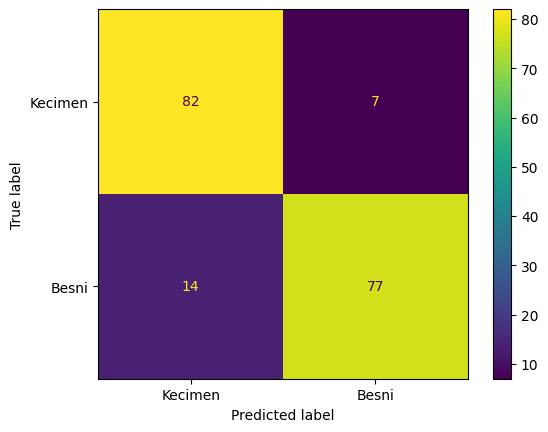

In [22]:
#Confusion MatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rice_classes)
cm_display.plot()
plt.show()


#Cross Validation

In [23]:
#Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", scores)



Cross-validation scores: [0.875      0.84722222 0.84027778 0.83333333 0.90277778]
